In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)

# 1. Linear Regression with stochastic gradient descent

In [3]:
from linear_regression import LinearRegression
from sklearn import model_selection

n = 1000
X_linreg = 2 * np.random.rand(n, 1)
y_linreg = 2 * X_linreg + 3 + np.random.randn(n, 1)

X_train_linreg, X_test_linreg, y_train_linreg, y_test_linreg = model_selection.train_test_split(
    X_linreg.reshape(-1, 1), y_linreg, test_size = 0.3)

lin_reg = LinearRegression(batch_size=10)
lin_reg.fit(X_train_linreg, y_train_linreg)

y_pred_linreg = lin_reg.predict(X_test_linreg)

3.1744158626492425 1.926478509616225


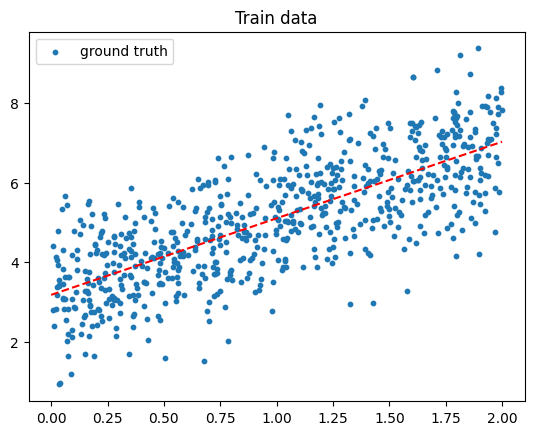

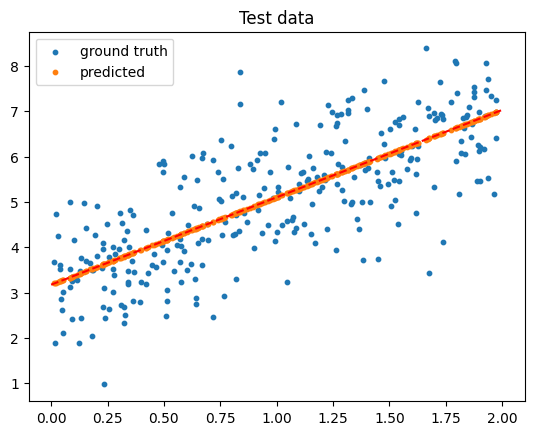

In [4]:
slope, intercept = lin_reg.theta[0][0], lin_reg.theta[1][0]
print(slope, intercept)

plt.figure()
plt.scatter(X_train_linreg, y_train_linreg, s=10, label="ground truth")
plt.plot(np.array([0, 2]), lin_reg.predict(np.array([0,2])), ls="--", c="red")
plt.legend()
plt.title("Train data")
plt.show()

plt.figure()
plt.scatter(X_test_linreg, y_test_linreg, s=10, label="ground truth")
plt.scatter(X_test_linreg, y_pred_linreg, s=10, label="predicted")
plt.plot(np.array([0, 2]), lin_reg.predict(np.array([0,2])), ls="--", c="red")
plt.legend()
plt.title("Test data")
plt.show()

# 2. Logistic Regression

In [5]:
from logistic_regression import LogisticRegression

n = 1000
X = np.random.rand(n, 2) # 2 features
y = (X[:,0] + X[:,1] > 1).astype(int).reshape(-1, 1) # class 1 if x1+x2 > 1

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.3
)
model = LogisticRegression(learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [6]:
n = 1000
X = np.random.rand(n, 2) # 2 features
y = (X[:,0] + X[:,1] > 1).astype(int).reshape(-1, 1) # class 1 if x1+x2 > 1

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.3
)
model = LogisticRegression(learning_rate=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

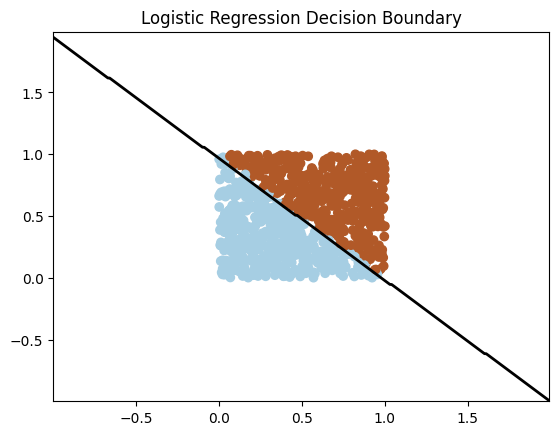

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap=plt.cm.Paired)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
plt.title('Logistic Regression Decision Boundary')
plt.show()

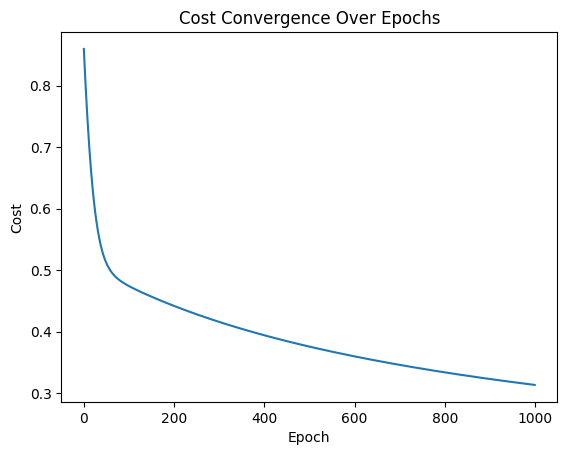

In [8]:
plt.plot(model.loss_history)
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost Convergence Over Epochs")
plt.show()

# 3. k-Nearest Neighbors

In [9]:
# toy dataset : Iris
from sklearn import datasets

iris = datasets.load_iris()
X = np.array(iris.data)
y = np.array(iris.target)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3)

In [10]:
# grid-search
from knn import KNearestNeighbors

for k in range(2, 20):
  knn = KNearestNeighbors(k=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  print(f'{k}: {len(y_pred[y_pred == y_test])/len(y_test):.2f}')

2: 0.96
3: 0.96
4: 0.96
5: 1.00
6: 1.00
7: 1.00
8: 0.98
9: 1.00
10: 0.98
11: 1.00
12: 1.00
13: 1.00
14: 0.98
15: 1.00
16: 1.00
17: 1.00
18: 0.98
19: 0.96


In [11]:
# cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

X, y = X_train.copy(), y_train.copy()

k_values = list(range(2, 20))
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for k in k_values:
  accuracies = []
  for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    knn = KNearestNeighbors(k=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)

    accuracies.append(accuracy_score(y_val, y_pred))
      
  avg_accuracy = np.mean(accuracies)
  print(f'{k}: {avg_accuracy:.2f}')

2: 0.96
3: 0.96
4: 0.96
5: 0.95
6: 0.96
7: 0.96
8: 0.96
9: 0.97
10: 0.97
11: 0.95
12: 0.96
13: 0.95
14: 0.96
15: 0.97
16: 0.95
17: 0.95
18: 0.94
19: 0.93


# 4. k-Means

In [12]:
from kmeans import KMeans

kmeans = KMeans(n_clusters=4)
y_train_pred = kmeans.fit(X_train)
y_test_pred = kmeans.predict(X_test)
kmeans.centroids

array([[4.76666667, 3.2       , 1.42777778, 0.22222222],
       [5.79722222, 2.75      , 4.35277778, 1.41944444],
       [6.825     , 3.16      , 5.635     , 2.115     ],
       [5.42      , 3.84      , 1.51      , 0.31      ]])

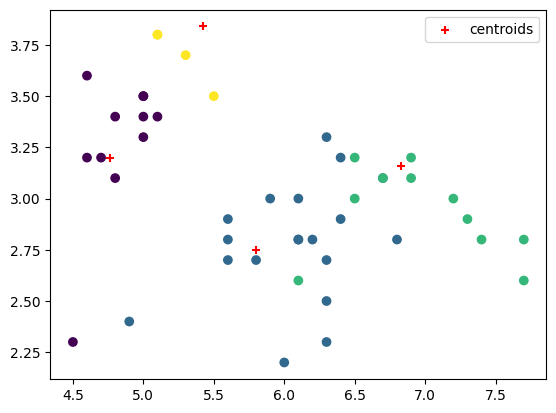

In [13]:
plt.figure()
plt.scatter(
    [c[0] for c in kmeans.centroids],
    [[c[1] for c in kmeans.centroids]],
    c="red", marker="+", label="centroids")
plt.scatter(X_test[:,0], X_test[:,1], c=y_test_pred)
plt.legend()
plt.show()

# 5. Decision Tree

In [14]:
# loading a toy dataset: Iris
iris = datasets.load_iris()
X = np.array(iris.data)
y = np.array(iris.target)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3)
print(X_train.shape, X_test.shape)

from decision_tree import DecisionTree

my_tree = DecisionTree(max_depth=4, min_samples_leaf=1)
my_tree.train(X_train, y_train)

train_preds = my_tree.predict(X_set=X_train)
print("Test size:", len(y_train))
print(f"Accuracy: {sum(train_preds == y_train)/len(y_train): .2f}")

test_preds = my_tree.predict(X_set=X_test)
print("Test size:", len(y_test))
print(f"Accuracy: {sum(test_preds == y_test)/len(y_test):.2f}")

(105, 4) (45, 4)
Test size: 105
Accuracy:  0.94
Test size: 45
Accuracy: 0.93
